In [1]:
import pandas as pd
import altair as alt

In [10]:
files = ["adolescent-births-2016", 
        "birth-rates-for-young-adult-women-2016",
        "child-housing-problems-2016",
        "child-living-arrangements-2016",
        "child-maltreatment-2016",
        "child-poverty-percent-2016",
        "exposure-to-violence-among-children-2016",
        "naep04-reading-2016",
        "young-adult-living-arrangements-2016"]

CSVs = []

for file in files:
    
    string_name = "data/" + file + ".csv"
    csv = pd.read_csv(string_name, encoding = 'cp437')
    
    # Some CSVs have encoding issue where '-' is encoded as 'û'
    csv = csv.replace('û', '-', regex=True) 
    
    # Add 'Notes' column if it does not exist
    csv["Notes"] = 0   
    
    # Add 'Note' column if it does not exist
    csv["Note"] = 0 
    
    # Drop Notes column
    csv = csv.drop(columns = ["Notes", "Note"])
    
    if "Standard Error on Percentage" in csv.columns:
        csv.drop(columns = "Standard Error on Percentage")
    
    #csv = csv.dropna()   # Drop rows with NAs
    CSVs.append(csv)

In [119]:
# Rename columns to be more sensible
adolescent_births = CSVs[0].rename(columns={"Percentage": "Rate (per 1,000 Females)"}
              ).drop(columns = ["Characteristic"]
                    ).dropna()

# Drop unnecessary columns ('characteristic' is functionally the same as 'ethnicity' column)
young_woman_births = CSVs[1].drop(columns="Characteristic").dropna()

young_woman_births = young_woman_births[['Race/ethnicity', 'Year', 'Rate (per 1,000 Females)', 'Age']]

# Remove standard error columns
# Remove 'count' column and leave percentage
# TODO: drop rows with "All households"
child_housing_problems = CSVs[2].drop(columns=['Standard Error on Count (in thousands)',
                                              'Standard Error on Percentage',
                                              'Count (in thousands)'])

# Drop 'characteristic' as it contains info overlapping with "race/ethnicity" column
# Drop "Margin of error" column
child_living_arrangements = CSVs[3].drop(columns=["Characteristic",
                                                  "Margin of Error on Percentages"]).dropna()

# Majority of Age column is NA
child_maltreatment = CSVs[4].drop(columns = ["Characteristic",
                                            "Age"]).dropna()


child_poverty_percent = CSVs[5].drop(columns=["Characteristic", 
                                              "Note on Percent",
                                             "Standard Error on Percentage"]).dropna()

# Drop unnecessary columns
exposure_to_violent_crime = CSVs[6].drop(columns=["Characteristic", 
                                                  "Note on Percent", 
                                                  "Note on Count",
                                                 "Standard Error on Percentage",
                                                 "Count",
                                                 "Standard Error on Count"]).dropna()

reading_scores = CSVs[7].drop(columns=["Characteristic",
                                       "Standard Error"]).dropna()

young_adult_living_arrangements = CSVs[8].drop(columns=["Characteristic",
                                                        "Count",
                                                        "Margin of Error on Percentages (for standard error divide by 1.645)"]).dropna()

## TODO: Clean up column names

In [120]:
# Add column to be consistent with 'young_woman_births' df
adolescent_births["Age"] = "Ages 15-17"
#adolesent_births

In [121]:
# Change "Year type to int
young_woman_births["Year"] = young_woman_births["Year"].astype("int64")

In [107]:
test = "Total - Hispanic, With severe housing problems"

In [123]:
test.split(sep = ",")

['Total - Hispanic', ' With severe housing problems']

In [124]:
child_housing_problems["Characteristic"] = child_housing_problems["Characteristic"].str.replace("Total - ", "")
#child_housing_problems

In [125]:
# Split the character column by racial category and housing variable
child_housing_problems["Characteristic"].str.rsplit(", ", expand=True, n=1)

# Set the housing variable as a column in the df
child_housing_problems["housing_situation"] = child_housing_problems["Characteristic"].str.rsplit(", ", expand=True, n=1)[1]

# Set the characteristic column to be consistent with the other dataframes
child_housing_problems["characteristic"] = child_housing_problems["Characteristic"].str.rsplit(", ", expand=True, n=1)[0]

# Drop the old Characteristic column
child_housing_problems = child_housing_problems.drop(columns = ["Characteristic"])

# child_housing_problems

In [126]:
# TODO
# How to aggregate this data so it's useful 
# child_maltreatment

In [127]:
pd.set_option('display.max_rows', 100)
child_poverty_percent['percent_living_in_poverty'] = child_poverty_percent['Percentage']
child_poverty_percent = child_poverty_percent.drop(columns = "Percentage")


In [128]:
# Change column name
exposure_to_violent_crime['percent_exposed_to_violent_crime'] = exposure_to_violent_crime['Percentage']
exposure_to_violent_crime = exposure_to_violent_crime.drop(columns = 'Percentage')

In [129]:
reading_scores['4th_grade_reading_scale_scores'] = reading_scores['Score']
reading_scores = reading_scores.drop(columns = 'Score')

In [177]:
young_woman_births

,Race/ethnicity,Year,"Rate (per 1,000 Females)",Age
15,"White, non-Hispanic",2000,57.5,Ages 18-19
16,"White, non-Hispanic",2001,54.7,Ages 18-19
17,"White, non-Hispanic",2002,52.0,Ages 18-19
18,"White, non-Hispanic",2003,52.0,Ages 18-19
19,"White, non-Hispanic",2004,48.6,Ages 18-19
...,...,...,...,...
175,Asian/Pacific Islander,2010,42.6,Ages 20-24
176,Asian/Pacific Islander,2011,41.9,Ages 20-24
177,Asian/Pacific Islander,2012,41.4,Ages 20-24
178,Asian/Pacific Islander,2013,39.1,Ages 20-24


In [176]:
young_woman_births['Race/ethnicity'].unique()

## TODO: remove space from the end of Black non hispanic column(s)

array(['White, non-Hispanic', 'Black, non-Hispanic ', 'Hispanic',
       'American Indian/Alaska Native', 'Asian/Pacific Islander',
       'Black, non-Hispanic', 'Hispanic,Ages 20-24'], dtype=object)

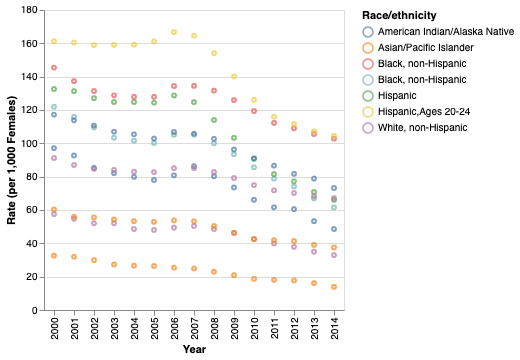

In [187]:
alt.Chart(young_woman_births).mark_point(size=15).encode(
    x = alt.X("Year:O"),
    y = alt.Y("Rate (per 1,000 Females):Q"),
    color = alt.Color("Race/ethnicity:N"))

In [188]:
## Use pivot table to pivot `young_woman_births` so each age is a column

young_woman_births_pivoted = young_woman_births.pivot_table(index = ["Race/ethnicity",
                                        "Year"],
                               columns = "Age", 
                               values="Rate (per 1,000 Females)").reset_index()

In [189]:
adolesent_births.merge(young_woman_births_pivoted, on = ['Race/ethnicity', 'Year'], how='inner')

NameError: name 'adolesent_births' is not defined

In [190]:
young_woman_births_pivoted

Age,Race/ethnicity,Year,Ages 18-19,Ages 20-24
0,American Indian/Alaska Native,2000,97.1,117.2
1,American Indian/Alaska Native,2001,92.7,113.8
2,American Indian/Alaska Native,2002,85.3,110.7
3,American Indian/Alaska Native,2003,82.1,107.0
4,American Indian/Alaska Native,2004,79.9,105.4
...,...,...,...,...
100,"White, non-Hispanic",2010,42.5,74.9
101,"White, non-Hispanic",2011,39.9,71.8
102,"White, non-Hispanic",2012,37.9,70.2
103,"White, non-Hispanic",2013,35.0,68.3
